<a href="https://colab.research.google.com/github/lucianogaldino/Analise-Covid19/blob/master/covid19_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DESCRIPTION OF THE PROBLEM SITUATION**

The objective of this project is to analyze the evolution of cases of covid19 in Brazil, make a future forecast and compare with other countries. The data table was removed from the WHO website (https://covid19.who.int/table) on 09/04/2020.

## **STRATEGY FOR THE SOLUTION OF THE PROBLEM SITUATION**

After processing the data, an analysis of the regression algorithms of Machine Learning   (linear regression, polynomial regression, random forest, support vectors (SVR) and artificial neural networks) will be performed.

## **INITIAL ANALYSIS AND DATA PROCESSING**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

In [2]:
covidmundial = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Covid19/COVID19.csv', sep=',')

In [3]:
covidmundial

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
39428,2020-08-31,ZW,Zimbabwe,AFRO,6,6412,0,196
39429,2020-09-01,ZW,Zimbabwe,AFRO,85,6497,6,202
39430,2020-09-02,ZW,Zimbabwe,AFRO,62,6559,1,203
39431,2020-09-03,ZW,Zimbabwe,AFRO,79,6638,3,206


In [4]:
covidbrasil = covidmundial.loc[covidmundial.country=='Brazil']

In [116]:
covidbrasil.head()

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4896,2020-02-26,BR,Brazil,AMRO,5,5,0,0
4897,2020-02-27,BR,Brazil,AMRO,0,5,0,0
4898,2020-02-28,BR,Brazil,AMRO,0,5,0,0
4899,2020-02-29,BR,Brazil,AMRO,0,5,0,0
4900,2020-03-01,BR,Brazil,AMRO,1,6,0,0


In [6]:
covidbrasil.shape

(192, 8)

In [7]:
covidbrasil.dtypes

date                 object
country_code         object
country              object
who_region           object
new_cases             int64
cumulative_cases      int64
new_deaths            int64
cumulative_deaths     int64
dtype: object

In [8]:
covidbrasil.isnull().sum()

date                 0
country_code         0
country              0
who_region           0
new_cases            0
cumulative_cases     0
new_deaths           0
cumulative_deaths    0
dtype: int64

In [9]:
covidmundial.isnull().sum()

date                   0
country_code         175
country                0
who_region             0
new_cases              0
cumulative_cases       0
new_deaths             0
cumulative_deaths      0
dtype: int64


175 records of attribute country_code were found as null values ​​(NaN), but this attribute will not be used in Machine Learning algorithms.

In [10]:
covidmundial.loc[covidmundial.new_cases < 0, :]

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
25,2020-03-20,AF,Afghanistan,EMRO,-2,24,0,0
1095,2020-03-24,AG,Antigua and Barbuda,AMRO,-2,3,0,0
1636,2020-03-19,AW,Aruba,AMRO,-3,5,0,0
2414,2020-03-20,BS,Bahamas,AMRO,-3,4,0,0
2960,2020-03-20,BB,Barbados,AMRO,-1,5,0,0
...,...,...,...,...,...,...,...,...
36347,2020-03-19,TT,Trinidad and Tobago,AMRO,-2,9,0,0
37112,2020-05-25,UG,Uganda,AFRO,-8,304,0,0
37140,2020-06-22,UG,Uganda,AFRO,-68,755,0,0
38030,2020-03-21,VI,United States Virgin Islands,AMRO,-1,6,0,0


In [11]:
# Checking negative values ​​in world records
covidmundial.loc[covidmundial.new_cases < 0, :].count()

date                 82
country_code         81
country              82
who_region           82
new_cases            82
cumulative_cases     82
new_deaths           82
cumulative_deaths    82
dtype: int64

In [12]:
# Checking negative values ​​in Brazil records
covidbrasil.loc[covidbrasil.new_cases < 0, :].count()

date                 0
country_code         0
country              0
who_region           0
new_cases            0
cumulative_cases     0
new_deaths           0
cumulative_deaths    0
dtype: int64

82 records were found with negative values ​​for the attributes new_cases and new_deaths. This was for data corrections. None of these situations occurred in Brazil. After statistical analysis, it will be decided whether it is consistent to exclude these records from the database

In [13]:
covidmundial_sum = covidmundial.groupby('date').agg({'new_cases': 'sum','cumulative_cases':'sum','new_deaths': 'sum','cumulative_deaths':'sum'}).reset_index()

In [14]:
covidmundial_sum

,date,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-01-04,1,1,0,0
1,2020-01-05,0,1,0,0
2,2020-01-06,3,4,0,0
3,2020-01-07,0,4,0,0
4,2020-01-08,0,4,0,0
...,...,...,...,...,...
240,2020-08-31,267850,25144425,5417,844473
241,2020-09-01,212698,25357123,3980,848453
242,2020-09-02,248989,25606112,4370,852823
243,2020-09-03,279613,25885725,6317,859140


## **STATISTICAL ANALYSIS**

In [15]:
covidmundial_sum.describe()

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
count,245.000000,2.450000e+02,245.000000,245.000000
mean,106820.865306,6.645875e+06,3531.240816,292884.012245
std,96260.245061,7.713624e+06,2598.699053,282859.017866
min,0.000000,1.000000e+00,0.000000,0.000000
25%,3919.000000,9.757600e+04,144.000000,3346.000000
50%,85754.000000,3.528783e+06,4233.000000,249991.000000
75%,191046.000000,1.112907e+07,5465.000000,524725.000000
max,297794.000000,2.617111e+07,12430.000000,865154.000000


In [16]:
covidbrasil.describe()

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
count,192.000000,1.920000e+02,192.000000,192.000000
mean,20822.213542,1.097211e+06,644.687500,41098.796875
std,19158.201448,1.268914e+06,482.608603,41370.781794
min,0.000000,5.000000e+00,0.000000,0.000000
25%,1819.250000,2.180850e+04,114.750000,1198.250000
50%,17259.000000,4.818030e+05,631.500000,28356.000000
75%,38775.500000,2.020695e+06,1112.750000,76978.750000
max,69074.000000,3.997865e+06,1595.000000,123780.000000



## **CORRELATIONS**

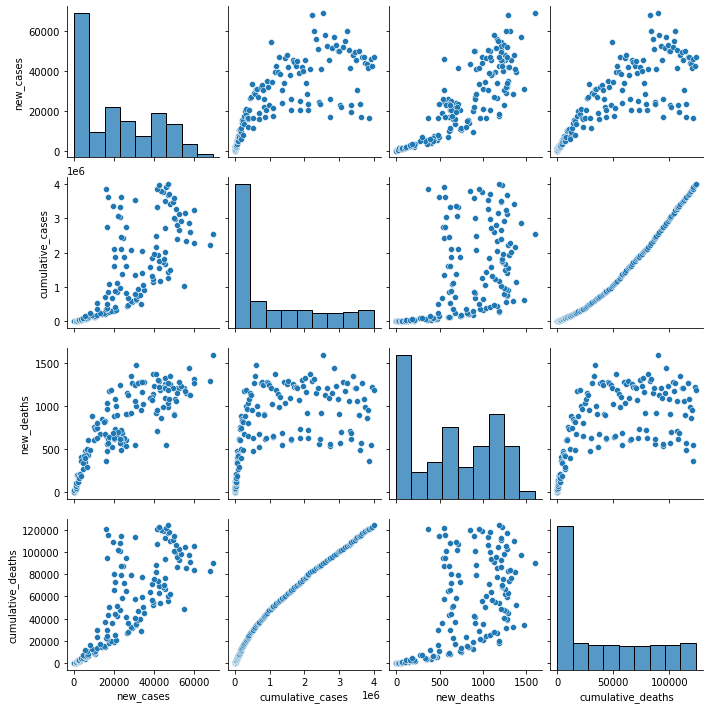

In [17]:
sns.pairplot(covidbrasil)

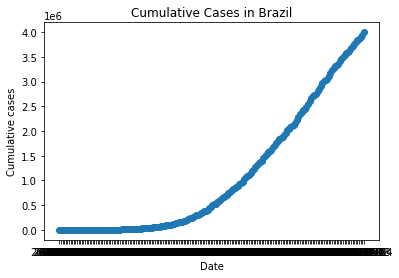

In [18]:
plt.scatter(covidbrasil.date,covidbrasil.cumulative_cases)
plt.xlabel('Date')
plt.ylabel('Cumulative cases')
plt.title('Cumulative Cases in Brazil')
plt.show()

In [19]:
correlacoes = covidbrasil.corr()

In [20]:
correlacoes

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
new_cases,1.000000,0.792903,0.887510,0.845639
cumulative_cases,0.792903,1.000000,0.605844,0.988883
new_deaths,0.887510,0.605844,1.000000,0.691147
cumulative_deaths,0.845639,0.988883,0.691147,1.000000


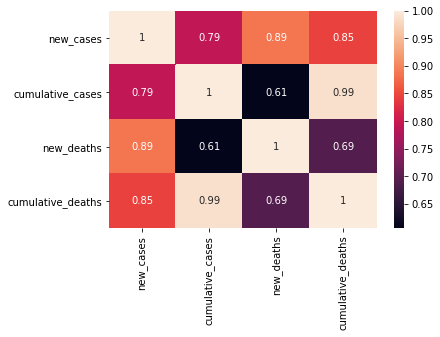

In [21]:
plt.figure()
sns.heatmap(correlacoes, annot=True)

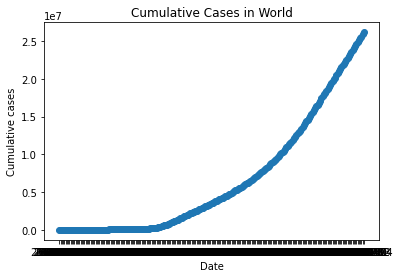

In [22]:
plt.scatter(covidmundial_sum.date,covidmundial_sum.cumulative_cases)
plt.xlabel('Date')
plt.ylabel('Cumulative cases')
plt.title('Cumulative Cases in World')
plt.show()

In [23]:
correlacoes2 = covidmundial_sum.corr()

In [24]:
correlacoes2

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
new_cases,1.000000,0.944187,0.760575,0.967044
cumulative_cases,0.944187,1.000000,0.601376,0.972804
new_deaths,0.760575,0.601376,1.000000,0.686943
cumulative_deaths,0.967044,0.972804,0.686943,1.000000


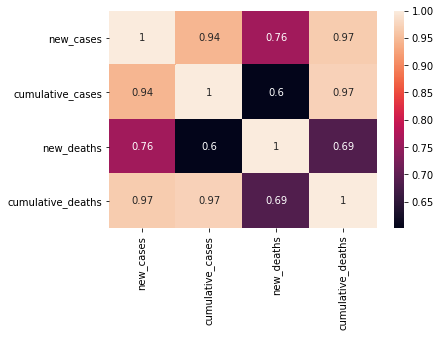

In [25]:
plt.figure()
sns.heatmap(correlacoes2, annot=True)

Text(0.5, 1.0, 'Evolution Cumulative Cases and Deaths in Brazil')

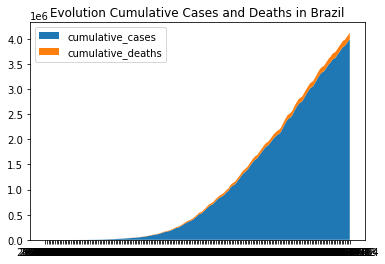

In [26]:
plt.stackplot(covidbrasil['date'], [covidbrasil['cumulative_cases'], covidbrasil['cumulative_deaths']],
              labels = ['cumulative_cases', 'cumulative_deaths'])
plt.legend(loc = 'upper left')
plt.title('Evolution Cumulative Cases and Deaths in Brazil')

Text(0.5, 1.0, 'Evolution Cumulative Cases and Deaths in World')

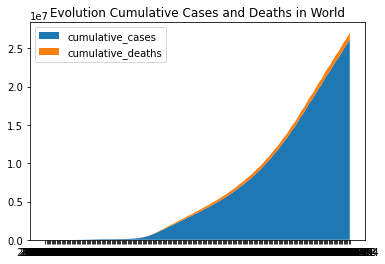

In [27]:
plt.stackplot(covidmundial_sum['date'], [covidmundial_sum['cumulative_cases'], covidmundial_sum['cumulative_deaths']],
              labels = ['cumulative_cases', 'cumulative_deaths'])
plt.legend(loc = 'upper left')
plt.title('Evolution Cumulative Cases and Deaths in World')

## **MACHINE LEARNING**

## POLINOMIAL REGRESSION

In [94]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
x = covidbrasil.drop(['country_code','country','who_region','new_cases','cumulative_cases','new_deaths','cumulative_deaths'], axis=1)						

In [96]:
x

,date
4896,2020-02-26
4897,2020-02-27
4898,2020-02-28
4899,2020-02-29
4900,2020-03-01
...,...
5083,2020-08-31
5084,2020-09-01
5085,2020-09-02
5086,2020-09-03


In [97]:
x = np.arange(len(x)).reshape(-1,1)#transformou as datas em índices (0,1,2,3,4...)

In [ ]:
x

In [98]:
y = covidbrasil.iloc[:, 5].values

In [99]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y,test_size = 0.3,shuffle = False, random_state = 0)

In [100]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_treinamento_poly = poly.fit_transform(x_treinamento)
x_teste_poly = poly.transform(x_teste)

In [101]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_treinamento_poly, y_treinamento)
score = regressor.score(x_treinamento_poly, y_treinamento)

In [102]:
previsoes = regressor.predict(x_teste_poly)

In [103]:
score

0.9848117026407015

In [104]:
from sklearn.metrics import mean_absolute_error

130819.22155164507

In [114]:
print('MAE:', mean_absolute_error(poly_teste_pred, y_teste))
print('MSE:', mean_squared_error(poly_teste_pred, y_teste))
print('RMSE:', np.sqrt(mean_absolute_error(poly_teste_pred, y_teste)))

MAE: 130819.22155164507
MSE: 19941217834.040596
RMSE: 361.68939928016283


In [105]:
poly_teste_pred = regressor.predict(x_teste_poly)

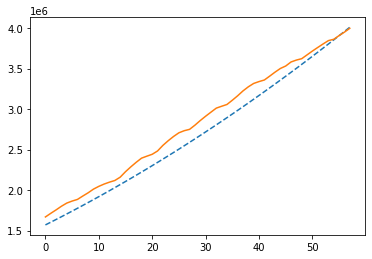

In [106]:
plt.plot(poly_teste_pred, linestyle = 'dashed')
plt.plot(y_teste)

In [107]:
forecast = np.arange(len(x) + 20).reshape(-1,1)#forescat significa previsão. ) + 20 é uma previsão de 20 dias a mais.

In [108]:
forecast.shape

(212, 1)

In [109]:
print(forecast)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]

In [110]:
x_train_all = poly.transform(forecast)
x_train_all.shape

(212, 3)

In [111]:
poly_pred_all = regressor.predict(x_train_all)
len(poly_pred_all)

212

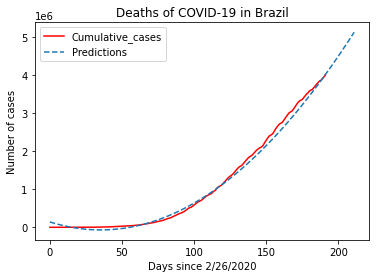

In [117]:
plt.plot(forecast[:-20], y, color='red')
plt.plot(forecast, poly_pred_all, linestyle='dashed')
plt.title('Deaths of COVID-19 in Brazil')
plt.xlabel('Days since 2/26/2020')
plt.ylabel('Number of cases')
plt.legend(['Cumulative_cases', 'Predictions']);